# **Liveness Detection**
By : Reynara Ezra Pratama

Dataset : [CelebA Spoof](https://www.kaggle.com/attentionlayer241/celeba-spoof-for-face-antispoofing)

## Import Library

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0
time: 1.73 ms (started: 2021-10-26 14:11:35 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.35 s (started: 2021-10-26 14:11:37 +00:00)


In [ ]:
import zipfile, os

local_zip = '/content/drive/MyDrive/Liveness Detection/Dataset 400 Images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Liveness Detection/Dataset')
zip_ref.close()

time: 2.28 s (started: 2021-10-26 14:11:40 +00:00)


In [ ]:
print(os.listdir('/tmp/Liveness Detection/Dataset'))

['Spoof', 'Live']
time: 1.75 ms (started: 2021-10-26 14:11:44 +00:00)


## Check Data

In [ ]:
print('Number of Real Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Live'))))
print('Number of Spoof Images : {}'.format(len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof'))))
print('Total Images : {}'.format(
    len(os.listdir('/tmp/Liveness Detection/Dataset/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Spoof')) 
    )
)

Number of Real Images : 200
Number of Spoof Images : 200
Total Images : 400
time: 5.42 ms (started: 2021-10-26 14:11:46 +00:00)


## Split Data Into Training and Testing

In [ ]:
!pip install split_folders
import splitfolders
splitfolders.ratio('/tmp/Liveness Detection/Dataset', 
                   '/tmp/Liveness Detection/Dataset/Data', 
                   seed=42, 
                   ratio=(0.8, 0.2))

Copying files: 400 files [00:00, 3256.12 files/s]

time: 3.48 s (started: 2021-10-26 14:13:18 +00:00)


In [ ]:
base_dir = '/tmp/Liveness Detection/Dataset/Data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset

time: 2.52 ms (started: 2021-10-26 14:13:24 +00:00)


In [ ]:
os.listdir('/tmp/Liveness Detection/Dataset/Data/train')

['Spoof', 'Live']

time: 5.28 ms (started: 2021-10-26 14:13:42 +00:00)


In [ ]:
os.listdir('/tmp/Liveness Detection/Dataset/Data/val')

['Spoof', 'Live']

time: 7.68 ms (started: 2021-10-26 14:13:44 +00:00)


In [ ]:
train_live_dir = os.path.join(train_dir, 'Live')
train_spoof_dir = os.path.join(train_dir, 'Spoof')

validation_live_dir = os.path.join(validation_dir, 'Live')
validation_spoof_dir = os.path.join(validation_dir, 'Spoof')

time: 4.03 ms (started: 2021-10-26 14:13:48 +00:00)


## Check Train and Test Data

**Train Data**

In [ ]:
total_size_train = (
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/train/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/train/Spoof'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 320
time: 5.89 ms (started: 2021-10-26 14:14:05 +00:00)


**Test Data**

In [ ]:
total_size_test = (
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/val/Live')) + 
    len(os.listdir('/tmp/Liveness Detection/Dataset/Data/val/Spoof'))
)
print('Total Testing Data is : {}'.format(total_size_test))

Total Testing Data is : 80
time: 7.8 ms (started: 2021-10-26 14:14:41 +00:00)


## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    #batch_size = 128,
    class_mode = 'binary'
)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
time: 833 ms (started: 2021-10-26 14:14:45 +00:00)


## Construct Model Using CNN

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 5.81 s (started: 2021-10-26 14:14:49 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 16.3 ms (started: 2021-10-26 14:15:00 +00:00)


In [ ]:
history = model.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
10/10 [==============================] - 35s 448ms/step - loss: 0.7252 - accuracy: 0.5063 - val_loss: 0.6348 - val_accuracy: 0.6875
Epoch 2/50
10/10 [==============================] - 4s 412ms/step - loss: 0.5046 - accuracy: 0.7812 - val_loss: 0.4437 - val_accuracy: 0.8125
Epoch 3/50
10/10 [==============================] - 4s 413ms/step - loss: 0.3600 - accuracy: 0.8594 - val_loss: 0.3906 - val_accuracy: 0.8625
Epoch 4/50
10/10 [==============================] - 4s 411ms/step - loss: 0.3500 - accuracy: 0.8844 - val_loss: 0.5727 - val_accuracy: 0.7750
Epoch 5/50
10/10 [==============================] - 4s 415ms/step - loss: 0.3598 - accuracy: 0.8406 - val_loss: 0.2517 - val_accuracy: 0.9125
Epoch 6/50
10/10 [==============================] - 4s 415ms/step - loss: 0.3216 - accuracy: 0.8813 - val_loss: 0.2018 - val_accuracy: 0.9250
Epoch 7/50
10/10 [==============================] - 4s 411ms/step - loss: 0.2997 - accuracy: 0.8938 - val_loss: 0.2325 - val_accuracy: 0.9500
Epoch

In [ ]:
model_1 = tf.keras.models.Sequential([
# first CONV => RELU => CONV => RELU => POOL layer set                                   
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150, 150, 3)),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# second CONV => RELU => CONV => RELU => POOL layer set
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Dropout(0.25),

# first (and only) set of FC => RELU layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  #tf.keras.layers.BatchNormalization(1),
  tf.keras.layers.Dropout(0.5), 

# softmax classifier
  tf.keras.layers.Dense(1, activation='sigmoid')
])

time: 112 ms (started: 2021-10-26 14:18:58 +00:00)


In [ ]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

time: 13.2 ms (started: 2021-10-26 14:18:58 +00:00)


In [ ]:
history_1 = model_1.fit(
    train_generator,
    epochs = 50,
    #callbacks = [reduce_LR, stop_early],
    validation_data = validation_generator,
    verbose = 1
)

Epoch 1/50
10/10 [==============================] - 6s 427ms/step - loss: 1.1092 - accuracy: 0.4875 - val_loss: 0.6872 - val_accuracy: 0.5375
Epoch 2/50
10/10 [==============================] - 4s 416ms/step - loss: 0.6796 - accuracy: 0.5469 - val_loss: 0.6625 - val_accuracy: 0.7000
Epoch 3/50
10/10 [==============================] - 4s 398ms/step - loss: 0.6287 - accuracy: 0.6406 - val_loss: 0.5506 - val_accuracy: 0.7750
Epoch 4/50
10/10 [==============================] - 4s 402ms/step - loss: 0.5602 - accuracy: 0.7375 - val_loss: 0.6692 - val_accuracy: 0.6000
Epoch 5/50
10/10 [==============================] - 4s 395ms/step - loss: 0.5584 - accuracy: 0.7437 - val_loss: 0.4556 - val_accuracy: 0.8750
Epoch 6/50
10/10 [==============================] - 4s 395ms/step - loss: 0.4666 - accuracy: 0.8000 - val_loss: 0.3759 - val_accuracy: 0.8625
Epoch 7/50
10/10 [==============================] - 4s 394ms/step - loss: 0.4482 - accuracy: 0.8344 - val_loss: 0.3547 - val_accuracy: 0.8750
Epoch 

## Plot Model History

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 20.2 ms (started: 2021-10-26 14:22:26 +00:00)


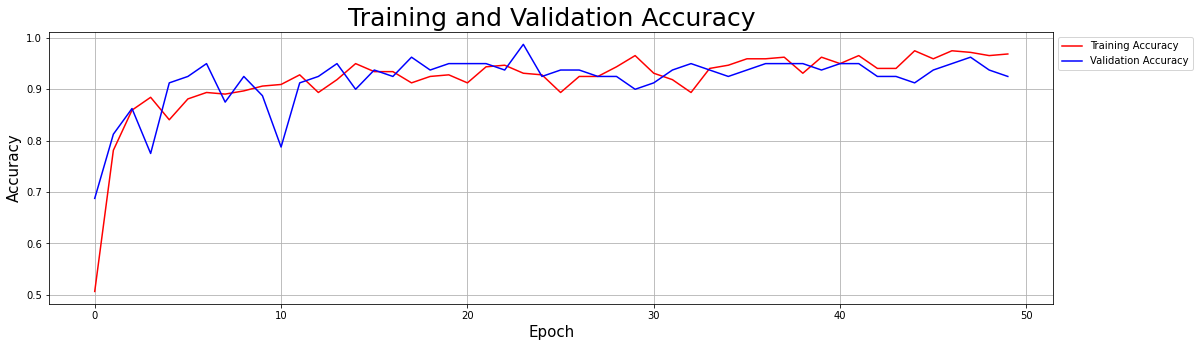

time: 289 ms (started: 2021-10-26 14:22:26 +00:00)


In [ ]:
plot_accuracy(history)

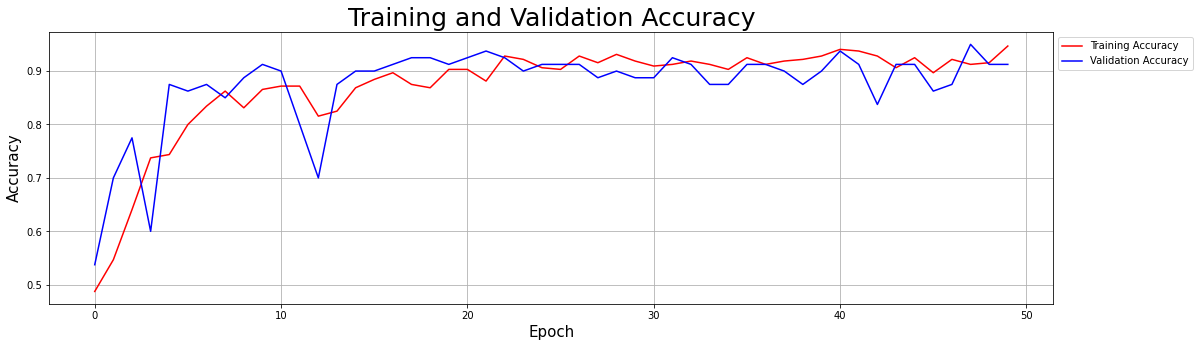

time: 254 ms (started: 2021-10-26 14:22:26 +00:00)


In [ ]:
plot_accuracy(history_1)

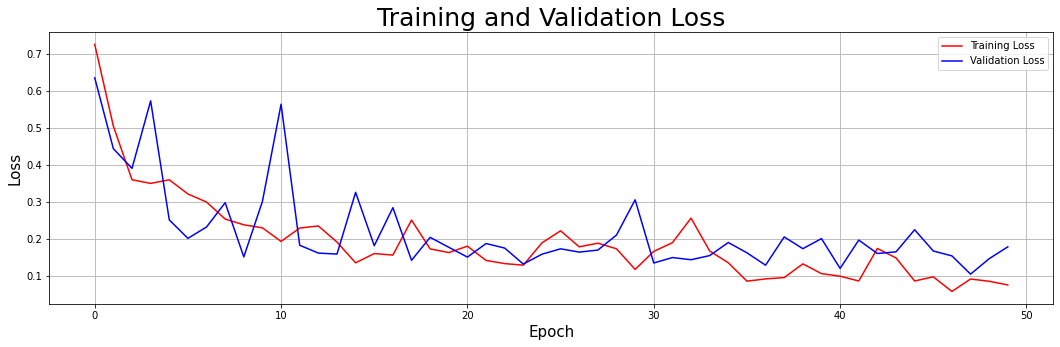

time: 277 ms (started: 2021-10-26 14:22:26 +00:00)


In [ ]:
plot_loss(history)

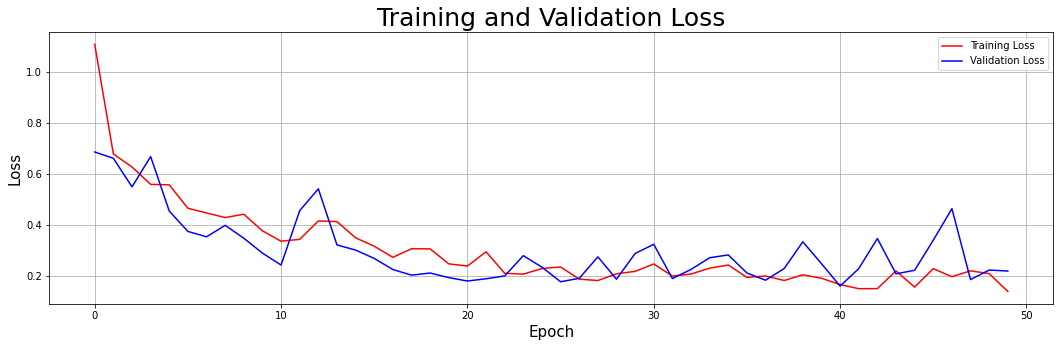

time: 244 ms (started: 2021-10-26 14:22:27 +00:00)


In [ ]:
plot_loss(history_1)

In [ ]:
model.save('model.h5')

time: 113 ms (started: 2021-10-26 14:29:02 +00:00)


In [ ]:
model_1.save('model_1.h5')

time: 98 ms (started: 2021-10-26 14:29:21 +00:00)
